# Letter to the editor: a note on “A New Extended Rayleigh Distribution”

authors: [Luiz R. Nakamura](luiz.rn@gmail.com), [Thiago G. Ramires](thiagogentil@gmail.com) and [Ana J. Righetto](ajrighetto@gmail.com)

Here we present some review and results of the paper: 
A. A. Al-Babtain, A new extended Rayleigh distribution, Journal of King Saud University – Science, https://doi.org/10.1016/j.jksus.2020.04.015


All results obtained in this review was obtained using the software R, where the codes are shown below, step by step.  

# Getting started

* First, we load the data (gauge lengths of 10 mm) obtained from D. Kundu and MZ Raqab (2009).
* Then, we construct the probability density function (pdf) and cumulative density fuctuion (cdf) of the Rayleigh (R) and type I half-logistic Rayleigh (TIHLR) models. 



In [3]:
#data set
x <- c(1.901, 2.132, 2.203, 2.228, 2.257, 2.350, 2.361, 2.396, 2.397, 2.445, 2.454, 2.474, 2.518, 2.522, 
       2.525, 2.532, 2.575, 2.614, 2.616, 2.618, 2.624, 2.659, 2.675, 2.738, 2.740, 2.856, 2.917, 2.928, 
       2.937, 2.937, 2.977, 2.996, 3.030, 3.125, 3.139, 3.145, 3.220, 3.223, 3.235, 3.243, 3.264, 3.272, 
       3.294, 3.332, 3.346, 3.377, 3.408, 3.435, 3.493, 3.501, 3.537, 3.554, 3.562, 3.628, 3.852, 3.871, 
       3.886, 3.971, 4.024, 4.027, 4.225, 4.395, 5.020)

#Rayleigh cdf and pdf
cdf0=function(par,x){
  alpha=par[1]; 
  1-exp(-alpha*x^2)}

pdf0=function(par,x){
  alpha=par[1]; 
  2*alpha*x*exp(-alpha*x^2)}


#TIHLR cdf and pdf
cdf1=function(par,x){
  alpha=par[1];  lambda=par[2]
  (1-exp(-alpha*lambda*x^2))/(1+exp(-alpha*lambda*x^2))}

pdf1=function(par,x){
  alpha=par[1];  lambda=par[2]
  (4*lambda*alpha*x*exp(-alpha*lambda*x^2))/((1+exp(-alpha*lambda*x^2))^2)}



Now, we refit the results presented in [Table 2](https://doi.org/10.1016/j.jksus.2020.04.015). To make it easier, we are going to use the `AdequacyModel` package. An important note here is that the estimation methods may not be the same, so we will consider the values presented in the paper in a future step.

In [16]:
#refitting
library(AdequacyModel)
options(warn=-1)
#Rayleigh
R=goodness.fit(pdf=pdf0, cdf=cdf0,
             starts = c(0.029),data=x,
             lim_inf = c(0),lim_sup = c(10),
             domain=c(0,Inf),method='SANN')

#TIHLR
TI=goodness.fit(pdf=pdf1, cdf=cdf1,
             starts = c(0.029,5.267),data=x,
             lim_inf = c(0,0),lim_sup = c(10,10),
              domain=c(0,Inf),method="SANN")


Comparing with the values presented in Table 2. We may note that the MLEs are not the same, but they are close. 

In [17]:
results1=cbind(alpha=c(0.029,0.103,round(TI$mle[1],3),round(R$mle,3)),
               lambda=c(5.267,'-',round(TI$mle[2],3),'-'))
row.names(results1)=c('TIHLR (paper)','R (paper)','TIHLR (refitted)','R (refitted)')
results1


,alpha,lambda
TIHLR (paper),0.029,5.267
R (paper),0.103,-
TIHLR (refitted),0.028,5.581
R (refitted),0.103,-


We now compare the goodness of measures for estimates presented on [Table 3](https://doi.org/10.1016/j.jksus.2020.04.015). Here we may note some inconsistencies.

In [6]:
results2=cbind(AIC=c(173.4,round(TI$AIC,1),189.0,round(R$AIC,1)),
               CAIC=c(173.6,round(TI$`CAIC `,1),189.1,round(R$`CAIC `,1)),
               BIC=c(173.0,round(TI$BIC,1),188.8,round(R$BIC,1)),
               HQIC=c(175.1,round(TI$HQIC,1),189.8,round(R$HQIC,1)),
               A=c(18.49,round(TI$A,1),32.8,round(R$A,1)),
               W=c(1.2,round(TI$W,1),1.7,round(R$W,1))
               )
row.names(results2)=c('TIHLR (paper)','TIHLR (refitted)','R (paper)','R (refitted)')
results2


,AIC,CAIC,BIC,HQIC,A,W
TIHLR (paper),173.4,173.6,173.0,175.1,18.49,1.2
TIHLR (refitted),172.7,172.9,177.0,174.4,0.50,0.1
R (paper),189.0,189.1,188.8,189.8,32.80,1.7
R (refitted),189.0,189.1,191.2,189.9,0.40,0.1


As mentioned earlier, we will consider the estimates presented on paper to obtain the goodness-of-fit measures (we only focus here on the TIHLR model). Once again we may note some incnsistencies. 

In [7]:
TIHLR=goodness.fit(pdf=pdf1, cdf=cdf1,
             mle = c(0.029,5.267),data=x,
             lim_inf = c(0,0),lim_sup = c(10,10),
             domain=c(0,Inf))
TIHLR

Warning message in ks.test(x = data, y = "cdf", par = as.vector(parameters)):
“ties should not be present for the Kolmogorov-Smirnov test”

$W
[1] 0.07747043

$A
[1] 0.5266872

$KS

	One-sample Kolmogorov-Smirnov test

data:  data
D = 0.32281, p-value = 3.969e-06
alternative hypothesis: two-sided


$AIC
[1] 172.7412

$CAIC
[1] 172.9412

$BIC
[1] 177.0275

$HQIC
[1] 174.427


As the authors proposed a new model, justifying that it is more flexible, we will compare the results with well-known and simple models, e.g., gama, log-normal and  inverse Gausian distributions. As we may note here, all of these models presented better fits.

In [12]:
#Comparing the results with other simpler models
library(gamlss)

#gama distribution
pdf2=function(par,x){
  mu=par[1];sigma=par[2]
  dGA(x,exp(mu),exp(sigma))}
cdf2=function(par,x){
  mu=par[1];sigma=par[2]
  pGA(x,exp(mu),exp(sigma))}


#log-normal distribution
pdf3=function(par,x){
  mu=par[1];sigma=par[2]
  dLOGNO(x,exp(mu),exp(sigma))}
cdf3=function(par,x){
  mu=par[1];sigma=par[2]
  pLOGNO(x,exp(mu),exp(sigma))}


#inverse g distribution
pdf4=function(par,x){
  mu=par[1];sigma=par[2]
  dIG(x,exp(mu),exp(sigma))}
cdf4=function(par,x){
  mu=par[1];sigma=par[2]
  pIG(x,exp(mu),exp(sigma))}


GA=goodness.fit(pdf=pdf2, cdf=cdf2,
                   starts = c(3,0.2),data=x,
                   lim_inf = c(-10,-10),lim_sup = c(10,10),
                   domain=c(0,Inf),method="SANN")
GA

LN=goodness.fit(pdf=pdf3, cdf=cdf3,
                   starts = c(0.09,-1.62),data=x,
                   lim_inf = c(-10,-10),lim_sup = c(10,10),
                   domain=c(0,Inf))
LN

IG=goodness.fit(pdf=pdf4, cdf=cdf4,
                   starts = c(1,-3),data=x,
                   lim_inf = c(-10,-10),lim_sup = c(10,10),
                   domain=c(0,1000))
IG

Loading required package: splines
Loading required package: gamlss.data
Loading required package: gamlss.dist
Loading required package: MASS
Loading required package: nlme
Loading required package: parallel
 **********   GAMLSS Version 5.0-1  ********** 
For more on GAMLSS look at http://www.gamlss.org/
Type gamlssNews() to see new features/changes/bug fixes.

Warning message in ks.test(x = data, y = "cdf", par = as.vector(parameters)):
“ties should not be present for the Kolmogorov-Smirnov test”

$W
[1] 0.05893154

$A
[1] 0.3631143

$KS

	One-sample Kolmogorov-Smirnov test

data:  data
D = 0.08845, p-value = 0.7078
alternative hypothesis: two-sided


$mle
[1]  1.117198 -1.621286

$AIC
[1] 117.7591

$`CAIC `
[1] 117.9591

$BIC
[1] 122.0454

$HQIC
[1] 119.4449

$Erro
[1] 0.02488915 0.08850049

$Value
[1] 56.87954

$Convergence
[1] 0


Warning message in ks.test(x = data, y = "cdf", par = as.vector(parameters)):
“ties should not be present for the Kolmogorov-Smirnov test”

$W
[1] 0.05712262

$A
[1] 0.3243542

$KS

	One-sample Kolmogorov-Smirnov test

data:  data
D = 0.090899, p-value = 0.6752
alternative hypothesis: two-sided


$mle
[1]  0.1023323 -1.5786085

$AIC
[1] 117.2007

$`CAIC `
[1] 117.4007

$BIC
[1] 121.4869

$HQIC
[1] 118.8865

$Value
[1] 56.60033


Warning message in goodness.fit(pdf = pdf4, cdf = cdf4, starts = c(1, -3), data = x, :
“The integral from 0 to 1000 of the probability density function has different from 1. Make sure the option 		      domain is correct.”Warning message in goodness.fit(pdf = pdf4, cdf = cdf4, starts = c(1, -3), data = x, :
“pdf is not a probability density function.”Warning message in ks.test(x = data, y = "cdf", par = as.vector(parameters)):
“ties should not be present for the Kolmogorov-Smirnov test”

$W
[1] 0.05601972

$A
[1] 0.3184216

$KS

	One-sample Kolmogorov-Smirnov test

data:  data
D = 0.076798, p-value = 0.8514
alternative hypothesis: two-sided


$mle
[1]  1.114715 -2.165246

$AIC
[1] 116.7786

$`CAIC `
[1] 116.9786

$BIC
[1] 121.0649

$HQIC
[1] 118.4645

$Value
[1] 56.38932


Finally, we compare the adjustments graphically.

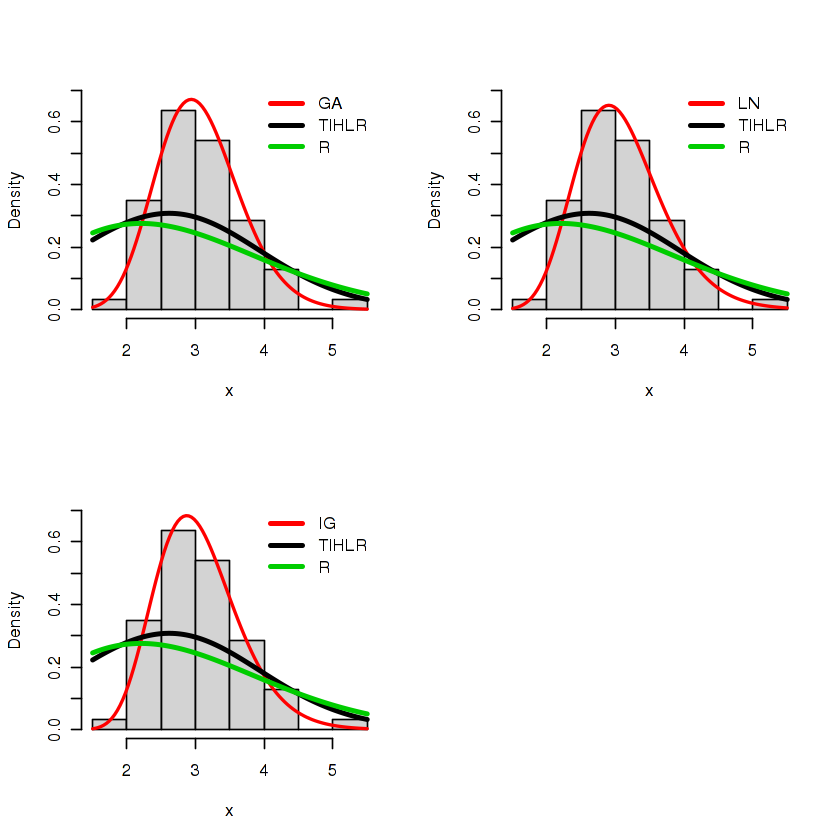

In [15]:
par(mfrow=c(2,2))
hist(x, probability = T, main='', ylim=c(0,.7), col='lightgrey')
curve(dGA(x,exp(GA$mle[1]),exp(GA$mle[2])), add=T, lwd=2, col='red')
curve(pdf1(par =c(0.029,5.267),x),add=T,lwd=3)
curve(pdf0(par =c(0.103),x),add=T,lwd=3,col=3)
legend('topright',c("GA",'TIHLR','R'),lwd=3,bty='n',col=c(2,1,3))


hist(x, probability = T, main='', ylim=c(0,.7), col='lightgrey')
curve(dLNO(x,exp(LN$mle[1]),exp(LN$mle[2])), add=T, lwd=2, col='red')
curve(pdf1(par =c(0.029,5.267),x),add=T,lwd=3)
curve(pdf0(par =c(0.103),x),add=T,lwd=3,col=3)
legend('topright',c("LN",'TIHLR','R'),lwd=3,bty='n',col=c(2,1,3))


hist(x, probability = T, main='', ylim=c(0,.7), col='lightgrey')
curve(dIG(x,exp(IG$mle[1]),exp(IG$mle[2])), add=T, lwd=2, col='red')
curve(pdf1(par =c(0.029,5.267),x),add=T,lwd=3)
curve(pdf0(par =c(0.103),x),add=T,lwd=3,col=3)
legend('topright',c("IG",'TIHLR','R'),lwd=3,bty='n',col=c(2,1,3))